In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porto-data/test.csv
/kaggle/input/porto-data/train.csv


In [2]:
porto = pd.read_csv("../input/porto-data/train.csv");
porto1 = pd.read_csv("../input/porto-data/test.csv");

In [3]:
print(porto.shape)
print(porto1.shape)
porto.head()

(416648, 59)
(178564, 58)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,335098,0,4,1,8,1,0,0,0,0,...,10,0,3,7,0,0,0,0,0,0
1,1353173,1,4,2,6,1,0,0,0,1,...,6,0,2,9,1,0,0,0,1,0
2,1446937,0,5,1,7,0,0,1,0,0,...,6,0,2,11,0,1,0,0,0,0
3,667154,0,3,3,5,0,0,0,1,0,...,3,1,3,6,0,0,1,0,0,0
4,859097,0,2,2,2,1,0,1,0,0,...,5,3,4,7,0,0,1,0,0,0


In [4]:
df = porto.copy()
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,335098,0,4,1,8,1,0,0,0,0,...,10,0,3,7,0,0,0,0,0,0
1,1353173,1,4,2,6,1,0,0,0,1,...,6,0,2,9,1,0,0,0,1,0
2,1446937,0,5,1,7,0,0,1,0,0,...,6,0,2,11,0,1,0,0,0,0
3,667154,0,3,3,5,0,0,0,1,0,...,3,1,3,6,0,0,1,0,0,0
4,859097,0,2,2,2,1,0,1,0,0,...,5,3,4,7,0,0,1,0,0,0


In [5]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


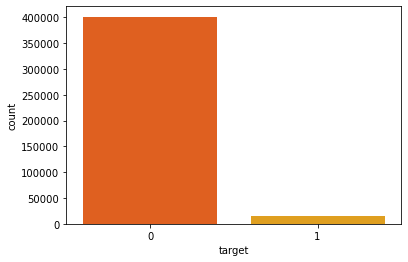

In [6]:
plt.figure()
sns.countplot(df['target'],palette='autumn')
plt.show()

In [7]:
target = df['target']
x =  target.value_counts()
#claim = (x[1]/df.shape[1])
print("Claimed Insurance : ", (x[1] / df.shape[0])* 100)
print("No Claimed Insurance : ", (x[0] / df.shape[0])* 100)

Claimed Insurance :  3.653203663524126
No Claimed Insurance :  96.34679633647588


In [9]:
features_miss= []

for i in df.columns:
    missing = df[df[i] == -1][i].count()
    if missing > 0:
        features_miss.append(i)
        miss_percent = missing/df.shape[0]
        
        print('{} has {} records ({:.3%}) with missing values'.format(i, missing, miss_percent))
        
print('There are {} variables with missing values'.format(len(i)))

ps_ind_02_cat has 148 records (0.036%) with missing values
ps_ind_04_cat has 55 records (0.013%) with missing values
ps_ind_05_cat has 4047 records (0.971%) with missing values
ps_reg_03 has 75476 records (18.115%) with missing values
ps_car_01_cat has 76 records (0.018%) with missing values
ps_car_02_cat has 2 records (0.000%) with missing values
ps_car_03_cat has 288186 records (69.168%) with missing values
ps_car_05_cat has 186614 records (44.789%) with missing values
ps_car_07_cat has 8095 records (1.943%) with missing values
ps_car_09_cat has 389 records (0.093%) with missing values
ps_car_11 has 1 records (0.000%) with missing values
ps_car_14 has 29822 records (7.158%) with missing values
There are 14 variables with missing values


In [10]:
df.drop(columns=['id'],axis=1,inplace=True)
print(df.columns)
target = df['target']

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [13]:
bin_features = df[['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin',
                        'ps_ind_17_bin', 'ps_ind_18_bin','ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']].copy()

In [17]:
bin_features = pd.concat([bin_features, target], axis=1)

In [18]:
bin_features.columns

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],
      dtype='object')

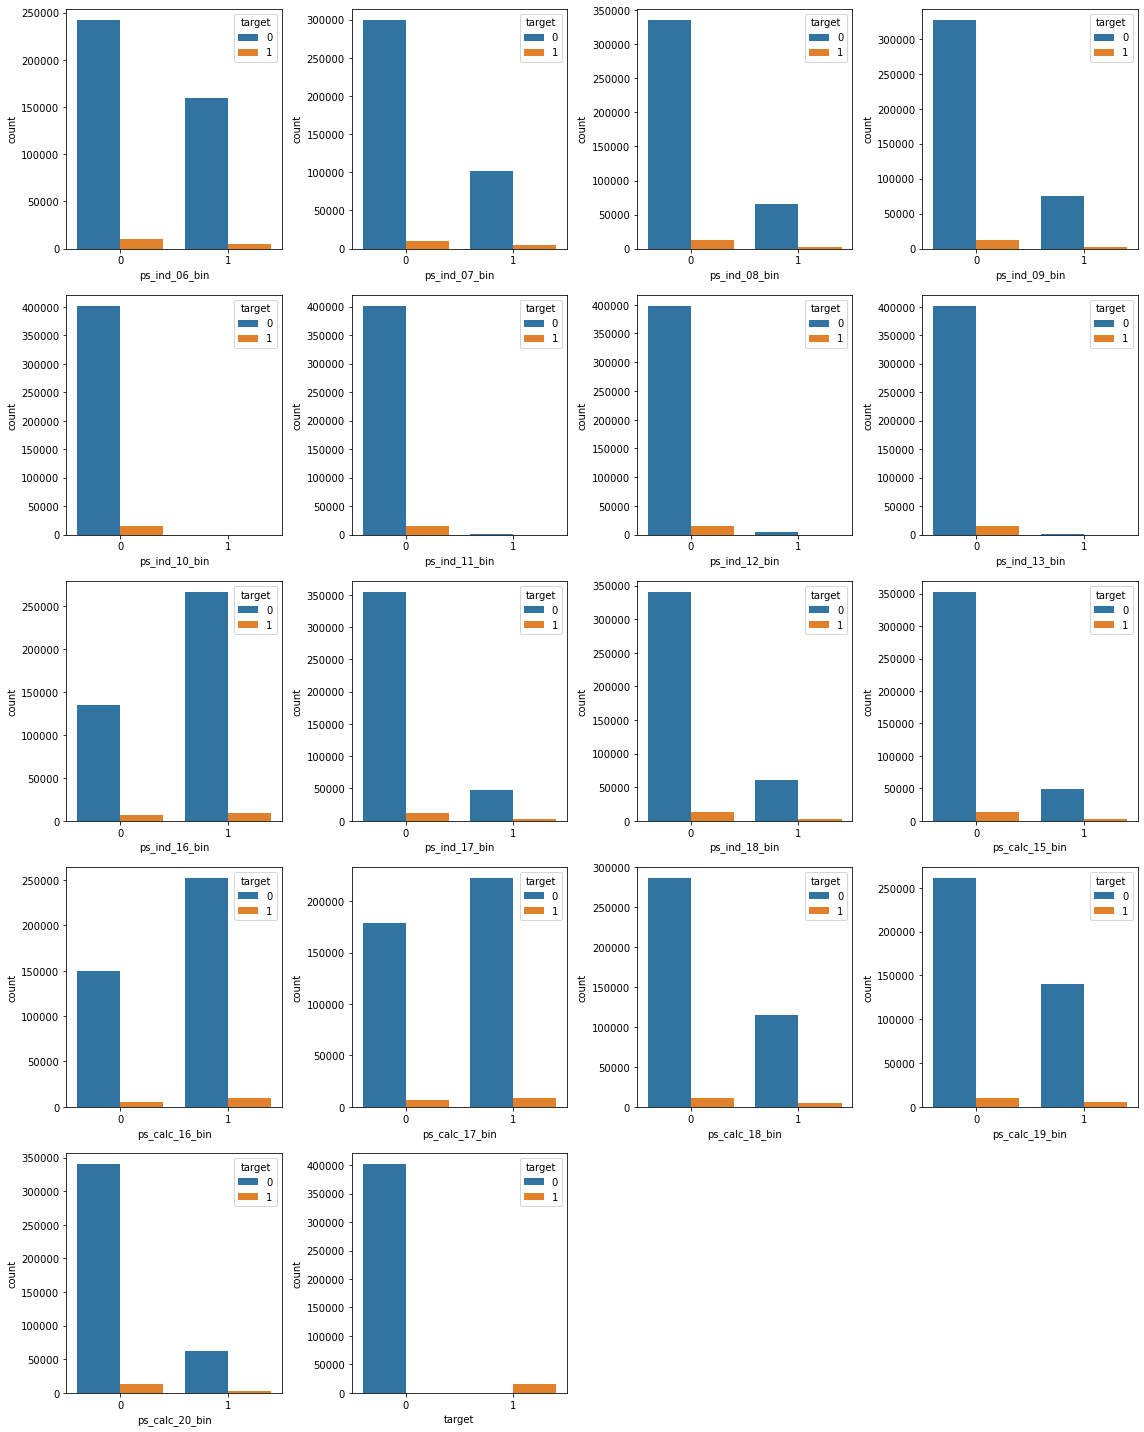

In [21]:
plt.figure(figsize=(16,20))
plt.title("Count Plots of Binary Features")
for i in enumerate(bin_features):
    plt.subplot(5,4,i[0]+1)
    plt.ylabel('Count')
    sns.countplot(i[1], hue = 'target', data = bin_features)
    plt.tight_layout()